In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [35]:
df = pd.read_csv('/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv')

In [36]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


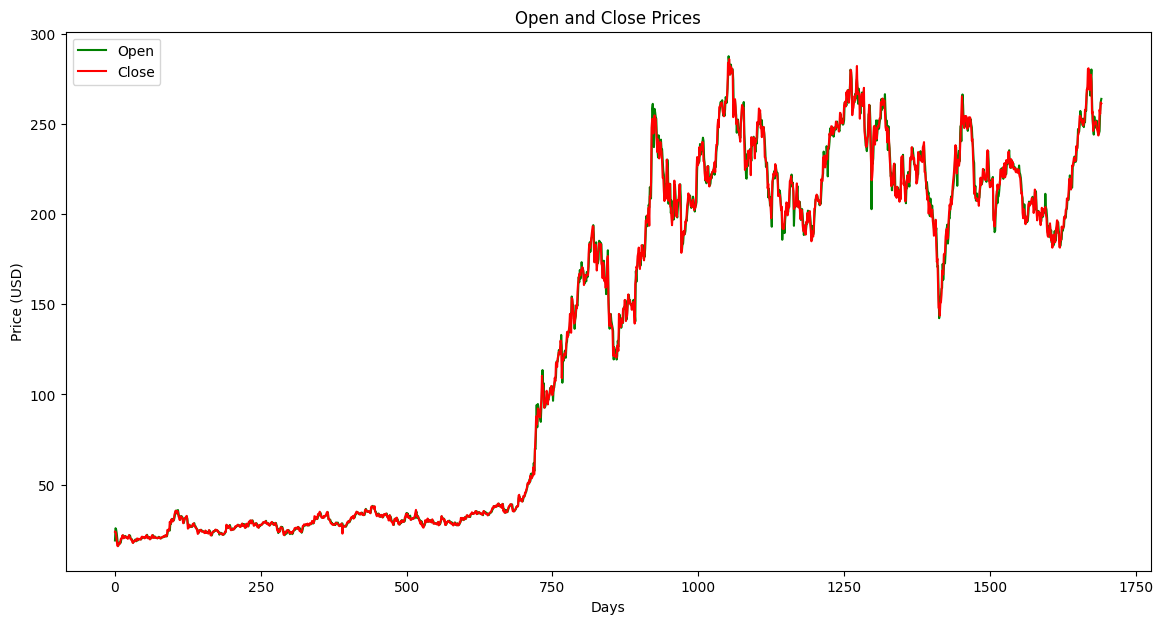

In [19]:
plt.figure(figsize=(14, 7))
plt.title('Open and Close Prices')
plt.plot(df['Open'], label='Open', color='green')
plt.plot(df['Close'], label='Close', color='red')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [37]:
dataset = df['Open'].values.reshape(-1, 1)  # Reshape to 2D array
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

In [38]:
split_ratio = 0.7
length_train = round(len(dataset_scaled) * split_ratio)
train_data = dataset_scaled[:length_train]
validation_data = dataset_scaled[length_train:]

In [39]:
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [40]:
time_step = 50
X_train, y_train = create_sequences(train_data, time_step)
X_val, y_val = create_sequences(validation_data, time_step)

In [41]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0717 - val_loss: 0.0051
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0042 - val_loss: 0.0054
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029 - val_loss: 0.0061
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

In [43]:
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [44]:
train_predict = scaler.inverse_transform(train_predict)
val_predict = scaler.inverse_transform(val_predict)

In [45]:
train_rmse = np.sqrt(mean_squared_error(dataset_scaled[time_step:length_train], train_predict))
val_rmse = np.sqrt(mean_squared_error(dataset_scaled[length_train + time_step:], val_predict))
print("RMSE on Train dataset:", train_rmse)
print("RMSE on Validation dataset:", val_rmse)


RMSE on Train dataset: 124.14018447638699
RMSE on Validation dataset: 217.67773664115768


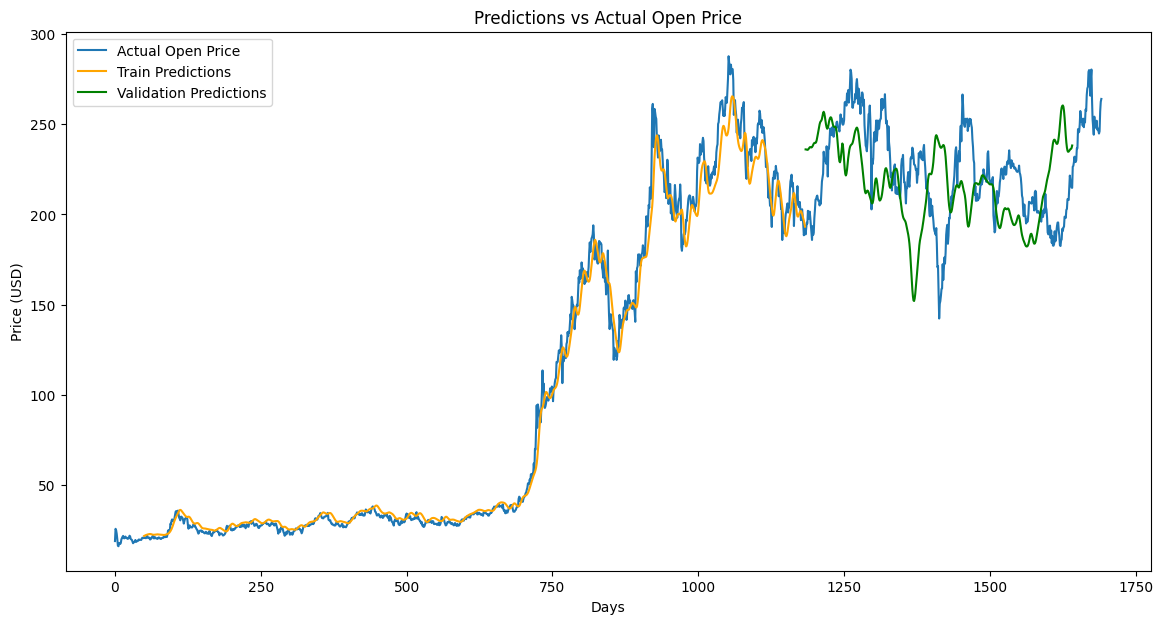

In [46]:
plt.figure(figsize=(14, 7))
plt.plot(df['Open'].values, label='Actual Open Price')
plt.plot(np.concatenate([np.full(time_step, np.nan), train_predict.flatten()]), label='Train Predictions', color='orange')
plt.plot(np.concatenate([np.full(len(train_predict) + time_step, np.nan), val_predict.flatten()]), label='Validation Predictions', color='green')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.title('Predictions vs Actual Open Price')
plt.legend()
plt.show()

# Review

defines the LSTM model architecture using the Keras library, comprising multiple LSTM layers with dropout regularization to prevent overfitting. The model is compiled with the Adam optimizer and mean squared error loss function.

The training process involves fitting the model to the training data for a specified number of epochs and batch size. The trained model is then used to make predictions on both the training and validation sets.

Finally, the model's performance is evaluated by calculating the root mean squared error (RMSE) between the actual and predicted open prices. The results are visualized using matplotlib, showing the actual open prices along with the predicted prices for both the training and validation periods.